## Başlangıç
Bu notebook'un amacı ham sensör verilerini anlamak, veri kalitesini sorgulamak ve arıza öncesi sinyalleri (anomalileri) görsel olarak tespit etmektir.

- Sensör verilerindeki (titreşim, sıcaklık vb.) desenleri analiz ederek, "BROKEN" durumuna giden yolu haritalandıracağız.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Görselleştirme ayarları 
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (15, 6)
pd.set_option('display.max_columns', None)

raw_data_path = '../data/raw/sensor.csv' # veri yükleme

if os.path.exists(raw_data_path):
    df = pd.read_csv(raw_data_path)
    print(f"Veri Yüklendi. Boyut(satır,sütun): {df.shape}")
else:
    print("Hata: Dosya bulunamadı. Lütfen data/raw klasörünü kontrol et.")

if 'Unnamed: 0' in df.columns:
    del df['Unnamed: 0']

# İlk 5 satıra bakış
df.head()

Veri Yüklendi. Boyut(satır,sütun): (220320, 55)


,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,NaN,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,NaN,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,NaN,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,NaN,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


- Veri seti zaman serisi formatındadır. `timestamp` sütunu datetime formatına çevrilecek ve index olarak atanacaktır. Bu, zaman bazlı filtreleme ve görselleştirmeyi kolaylaştırır.

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.set_index('timestamp') # timestamp'i index yap

print(f"Başlangıç Tarihi: {df.index.min()}")
print(f"Bitiş Tarihi:     {df.index.max()}")
print(f"Toplam Süre:      {df.index.max() - df.index.min()}")

df.info()

Başlangıç Tarihi: 2018-04-01 00:00:00
Bitiş Tarihi:     2018-08-31 23:59:00
Toplam Süre:      152 days 23:59:00
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       210112 non-null  float64
 1   sensor_01       219951 non-null  float64
 2   sensor_02       220301 non-null  float64
 3   sensor_03       220301 non-null  float64
 4   sensor_04       220301 non-null  float64
 5   sensor_05       220301 non-null  float64
 6   sensor_06       215522 non-null  float64
 7   sensor_07       214869 non-null  float64
 8   sensor_08       215213 non-null  float64
 9   sensor_09       215725 non-null  float64
 10  sensor_10       220301 non-null  float64
 11  sensor_11       220301 non-null  float64
 12  sensor_12       220301 non-null  float64
 13  sensor_13       220301 non-null  float64
 14  se

- Eksik değerler sütun bazlı: sensor_15 tamamen boş, sensor_50 çok eksik
- Pompaların durumunu inceleyelim. Veri setinde "BROKEN" durumu ne sıklıkla gerçekleşiyor? Bu dağılım, modelleme stratejimizi belirleyecek.

machine_status
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: count, dtype: int64


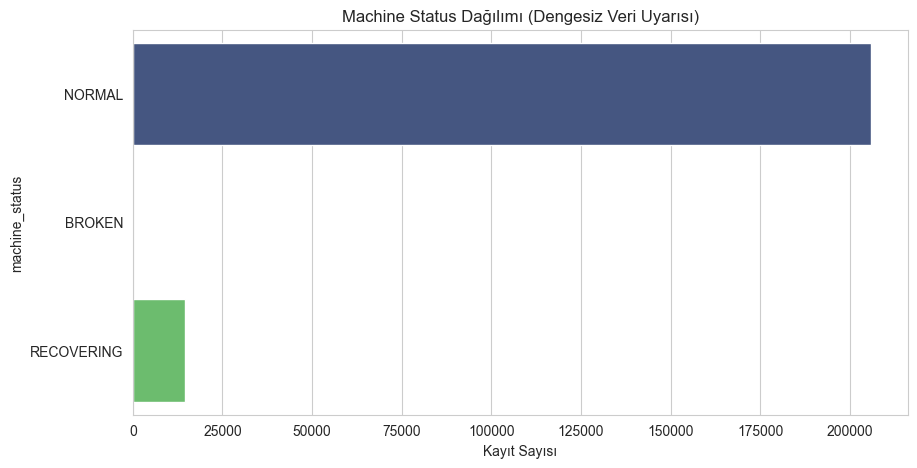

Veri setindeki Arıza (BROKEN) oranı: %0.0032


In [10]:
status_counts = df['machine_status'].value_counts()
print(status_counts)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)  #uyarıları gizledim görmek için kaldır

# Görselleştirme
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='machine_status', palette='viridis')
plt.title('Machine Status Dağılımı (Dengesiz Veri Uyarısı)')
plt.xlabel('Kayıt Sayısı')
plt.show()

# BROKEN yüzdesi
broken_ratio = (df[df['machine_status'] == 'BROKEN'].shape[0] / df.shape[0]) * 100
print(f"Veri setindeki Arıza (BROKEN) oranı: %{broken_ratio:.4f}")

- Hangi sensörlerde veri kaybı var? Çok fazla eksik verisi olan sensörleri analizden çıkarabiliriz veya doldurabiliriz.

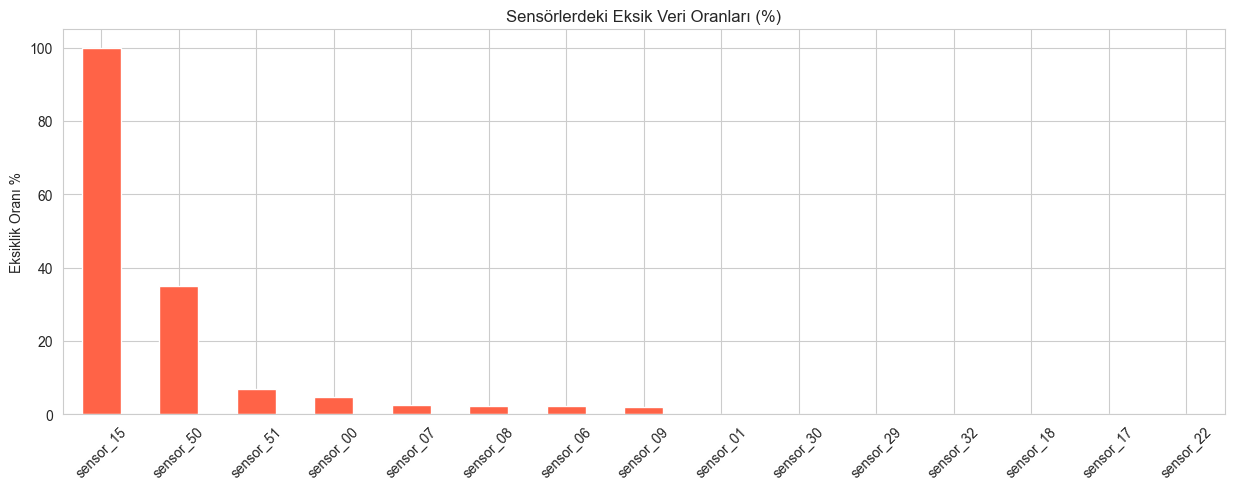

In [11]:
# Eksik değerlerin oranı
missing_ratio = (df.isna().sum() / len(df)) * 100
missing_ratio = missing_ratio.sort_values(ascending=False)

plt.figure(figsize=(15, 5))
missing_ratio[missing_ratio > 0].head(15).plot(kind='bar', color='tomato')
plt.title('Sensörlerdeki Eksik Veri Oranları (%)')
plt.ylabel('Eksiklik Oranı %')
plt.xticks(rotation=45)
plt.show()

# Not: sensor_15 ilerde kontrol edilmeli

- Bir sensörü (örneğin `sensor_04`) zaman ekseninde inceleyelim ve arıza ("BROKEN") anlarını kırmızı çizgilerle işaretleyelim. Arızadan önce sensör verisinde bir gürültü veya sapma görüyor muyuz?

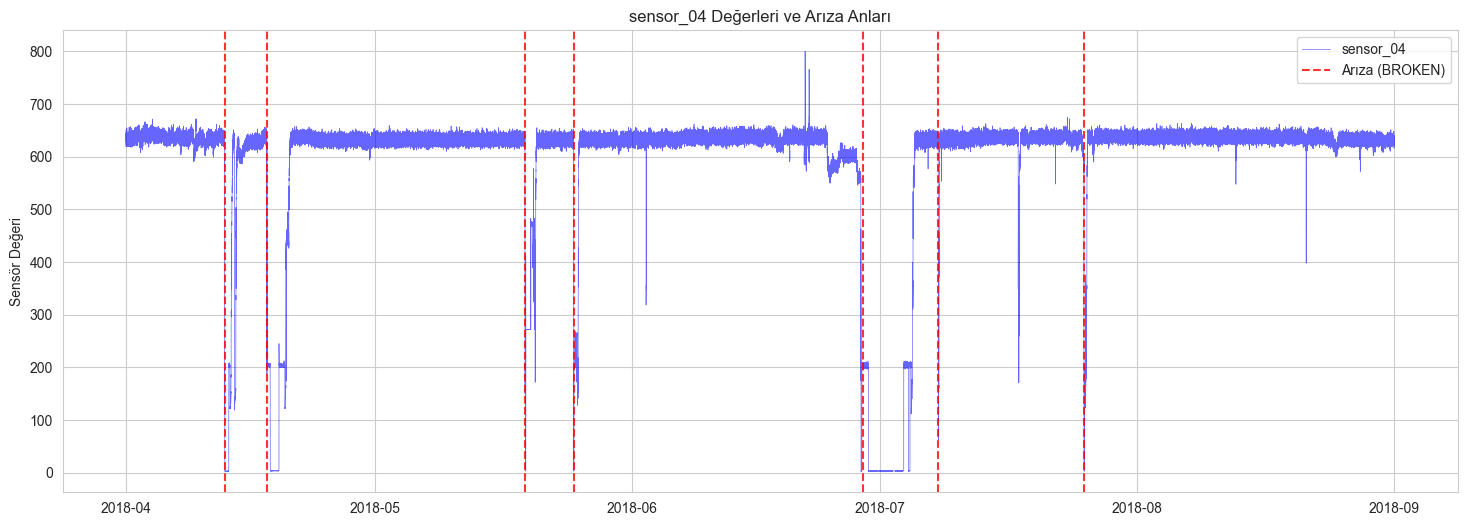

In [12]:
chosen_sensor = 'sensor_04'

plt.figure(figsize=(18, 6))

plt.plot(df.index, df[chosen_sensor], label=chosen_sensor, color='blue', alpha=0.6, linewidth=0.5) #sensör verisi çiz

# Arıza anlarını (BROKEN) bul ve işaretle
broken_dates = df[df['machine_status'] == 'BROKEN'].index
for date in broken_dates:
    plt.axvline(date, color='red', linestyle='--', alpha=0.8, label='Arıza (BROKEN)' if date == broken_dates[0] else "")

plt.title(f'{chosen_sensor} Değerleri ve Arıza Anları')
plt.ylabel('Sensör Değeri')
plt.legend()
plt.show()

- Gereksiz sütunları temizleyelim

In [13]:
df_clean = df.drop(['Unnamed: 0', 'sensor_15'], axis=1, errors='ignore') # Gereksiz Sütunları Sil

# Eksik Verileri Doldurma (Forward Fill) Sensör bir saniye önce neyse, bozulana kadar odur varsayımı.
df_clean = df_clean.fillna(method='ffill')

print(f"Eski Boyut: {df.shape} -> Yeni Boyut: {df_clean.shape}")

processed_path = '../data/processed/sensor_cleaned.csv'
os.makedirs(os.path.dirname(processed_path), exist_ok=True)
df_clean.to_csv(processed_path) #temizlenmiş veri kaydedildi

print(f"Dosya Kaydedildi: {processed_path}")

Eski Boyut: (220320, 53) -> Yeni Boyut: (220320, 52)
Dosya Kaydedildi: ../data/processed/sensor_cleaned.csv


- Görselleştirme yapalım.

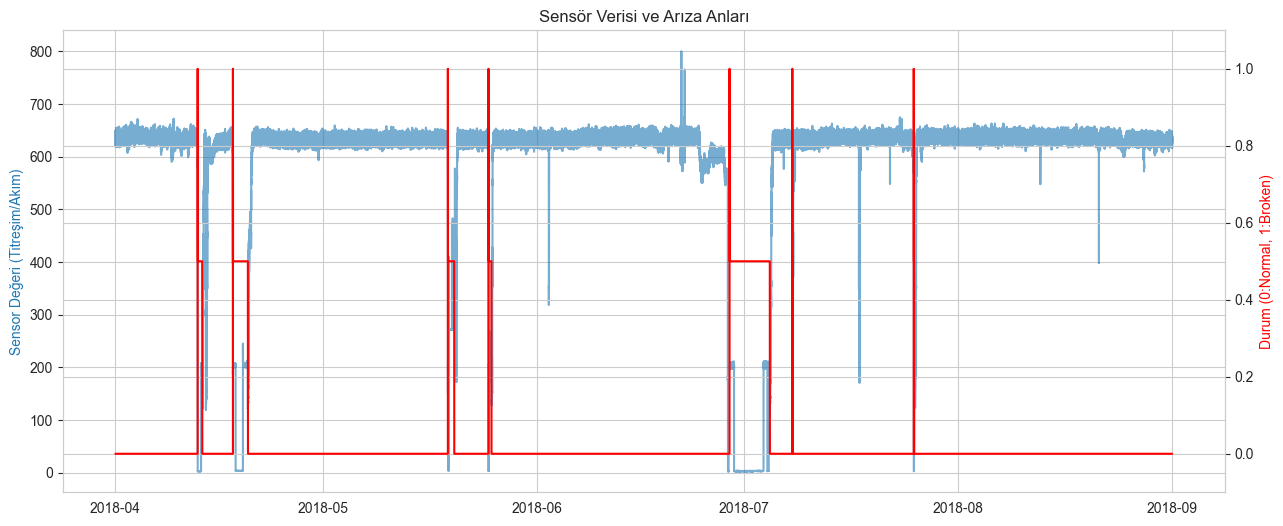

In [14]:
import matplotlib.pyplot as plt

# NORMAL: 0, BROKEN: 1, RECOVERING: 0.5 
status_map = {'NORMAL': 0, 'BROKEN': 1, 'RECOVERING': 0.5}
df_clean['status_numeric'] = df_clean['machine_status'].map(status_map)

# Örnek bir sensör (Sensor_04) ve Makine Durumu
fig, ax1 = plt.subplots(figsize=(15, 6))

# Sol Eksen: Sensör Verisi
ax1.plot(df_clean.index, df_clean['sensor_04'], color='tab:blue', alpha=0.6, label='Sensor_04')
ax1.set_ylabel('Sensor Değeri (Titreşim/Akım)', color='tab:blue')

# Sağ Eksen: Makine Durumu
ax2 = ax1.twinx()
ax2.plot(df_clean.index, df_clean['status_numeric'], color='red', linewidth=1.5, label='Makine Durumu')
ax2.set_ylabel('Durum (0:Normal, 1:Broken)', color='red')
ax2.set_ylim(-0.1, 1.1) # Skalayı sabitle

plt.title("Sensör Verisi ve Arıza Anları")
plt.show()



## Sonuçlar ve Kararlar

### 1. Veri Kalitesi ve Temizlik
* **Çıkarılan Öznitelikler:** `sensor_15` sütunu %100 boş olduğu için veri setinden çıkarıldı. `Unnamed: 0` indeksi silindi.
* **Eksik Veriler:** Sensörlerdeki anlık veri kayıpları, zaman serisinin sürekliliğini bozmamak adına `Forward Fill` (bir önceki değerle doldurma) yöntemiyle tamamlandı.
* **Veri Tipi:** `timestamp` sütunu datetime objesine çevrildi ve modellemenin zaman bazlı yapılabilmesi için indeks olarak atandı.

### 2. Problem Tanımı ve Etiketleme 
* **Dengesiz Veri:** Veri setinde 220.000+ kayıt arasında sadece **7 adet** "BROKEN" durumu bulunmaktadır (%0.003).
* **Karar:** Modelin sadece kırılma anını (tek bir satırı) tahmin etmesi imkansız ve işlevsizdir.
* **Yeni Hedef (Target):** Arıza gerçekleşmeden önceki **son 24 saati (veya 12 saati)** "Riskli Bölge" (Label = 1) olarak etiketleyeceğiz. Bu sayede:
    1.  Modelin öğrenebileceği pozitif örnek sayısı artacak (7 -> ~10.000).
    2.  İşletmeye "Pompa bozuldu" değil, "Pompa bozulmak üzere" uyarısı verebileceğiz.

### 3. Feature Engineering Yol Haritası
Ham sensör verileri (örneğin anlık titreşim) çok gürültülüdür. Modelin trendleri yakalayabilmesi için bir sonraki aşamada şu özellikler türetilecektir:
* **Rolling Window Statistics:** Son 1 saatlik ortalama, standart sapma, min/max değerleri.
* **Lag Features:** Sensörün 10 dakika önceki, 1 saat önceki değerleri arasındaki farklar.

**Özet:** Veri çok dengesizdi. Bu sebeple sadece kırılma anına değil, kırılma öncesindeki pencereye odaklanıcaz ve veri setini zenginleştiricez.

**Sonraki Adım:** `02_Baseline.ipynb` notebook'unda temel bir Random Forest modeli kurarak, bu stratejinin ilk sonuçlarını (F1-Score / Recall) gözlemlemek.